In [1]:
import os 

from models.VAE import VariationalAutoencoder
from utils.loaders import load_mnist, load_model

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm 

Using TensorFlow backend.


In [2]:
# run params
SECTION = 'vae'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [4]:
vae = VariationalAutoencoder(
    input_dim = (28, 28, 1),
    encoder_conv_filters = [16, 64, 64, 64],
    encoder_conv_kernel_size = [3, 3, 3, 3],
    encoder_conv_strides = [1, 2, 2, 1],
    decoder_conv_t_filters = [64, 64, 132, 1],
    decoder_conv_t_kernel_size = [3, 3, 3, 3],
    decoder_conv_t_strides = [1, 2, 2, 1],
    z_dim = 2
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weight(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W0606 20:14:28.535138  1564 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0606 20:14:28.552128  1564 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0606 20:14:28.565119  1564 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0606 20:14:28.622085  1564 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [5]:
vae.compile(0.0005, 1000)

W0606 20:14:29.576378  1564 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
LR = 0.0005
BATCH_SIZE = 64
INIT_EPOCH = 0

In [ ]:
vae.train(x_train, BATCH_SIZE, 100, RUN_FOLDER)

W0606 20:14:30.266067  1564 deprecation_wrapper.py:119] From C:\Users\brama\Miniconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
60000/60000 [==============================] - 43s 712us/step - loss: 60.8919 - vae_r_loss: 57.9193 - vae_kl_loss: 2.9725

Epoch 00001: saving model to run/vae/0002_digits\weights/weights-001-60.89.h5

Epoch 00001: saving model to run/vae/0002_digits\weights/weights.h5
Epoch 2/100
60000/60000 [==============================] - 39s 644us/step - loss: 52.4052 - vae_r_loss: 48.6426 - vae_kl_loss: 3.7627

Epoch 00002: saving model to run/vae/0002_digits\weights/weights-002-52.41.h5

Epoch 00002: saving model to run/vae/0002_digits\weights/weights.h5
Epoch 3/100
60000/60000 [==============================] - 41s 676us/step - loss: 50.9154 - vae_r_loss: 46.8469 - vae_kl_loss: 4.0685s - los

Epoch 00003: saving model to run/vae/0002_digits\weights/weights-003-50.92.h5

Epoch 00003: saving model to run/vae/0002_digits\weights/weights.h5
Epoch 4/100
60000/60000 [==============================] - 40s 663us/step - loss: 49.9790 - vae_r_loss: 45.7126 - vae_kl_loss: 4.2665

Epoch 00004:

In [ ]:
vae.save(RUN_FOLDER)

# Reconstructing

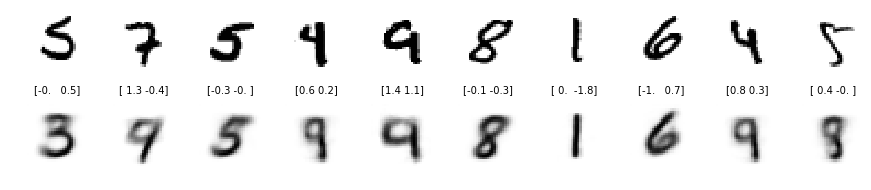

In [9]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')


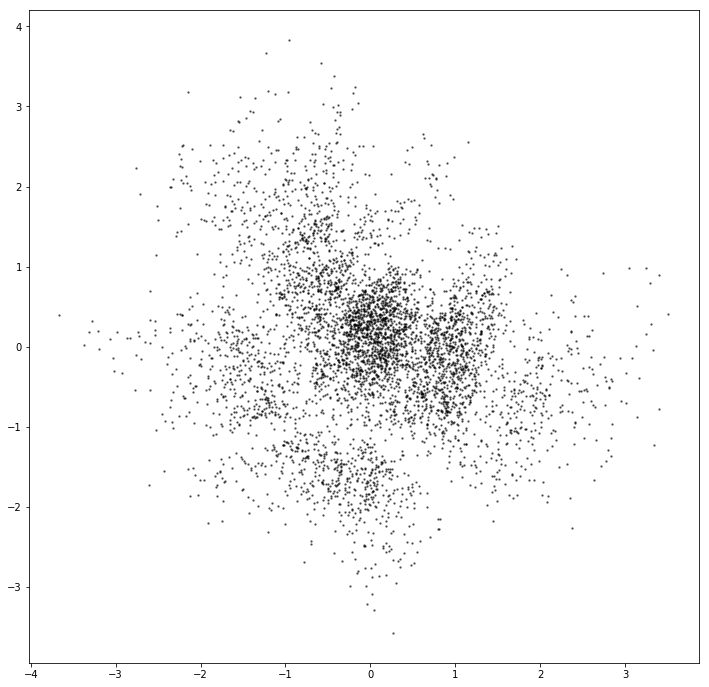

In [10]:
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

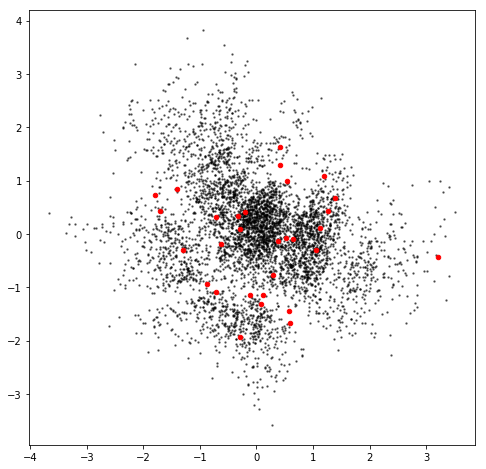

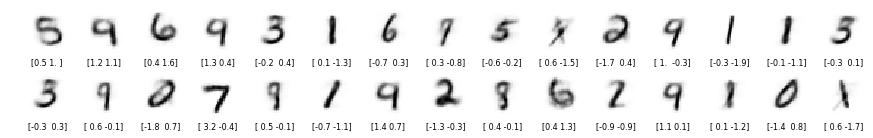

In [11]:
figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

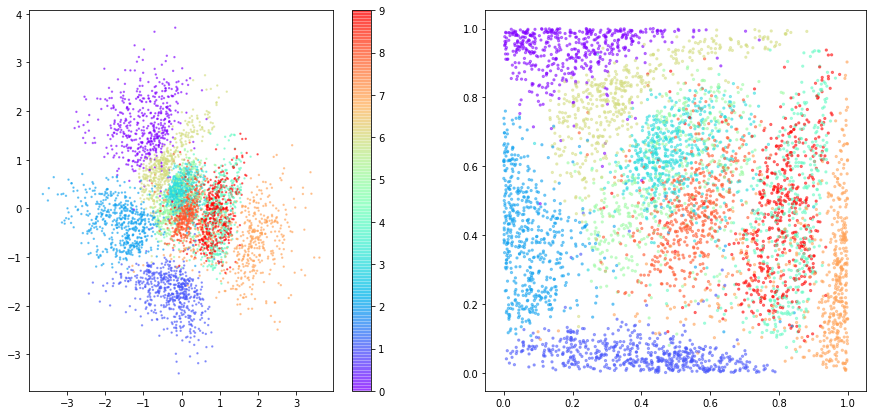

In [12]:
n_to_show = 5000
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=5)



plt.show()

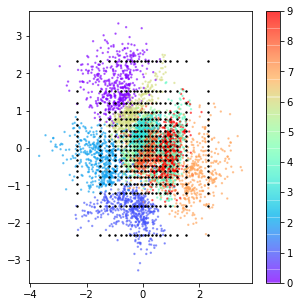

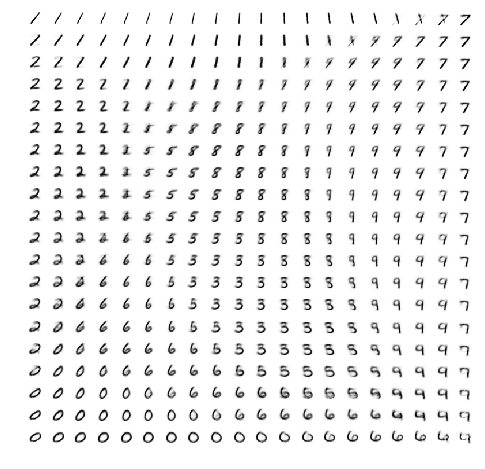

In [13]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = vae.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = vae.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')